In [56]:
import pandas as pd

csv_file_path = "input.csv"
df = pd.read_csv(csv_file_path)

print(df)

                        title                              movie_url  rating  \
0    The Shawshank Redemption  https://www.imdb.com/title/tt0111161/    9.30   
1               The Godfather  https://www.imdb.com/title/tt0068646/    9.20   
2             The Dark Knight  https://www.imdb.com/title/tt0468569/    9.00   
3       The Godfather Part II  https://www.imdb.com/title/tt0071562/    9.00   
4                12 Angry Men  https://www.imdb.com/title/tt0050083/    9.00   
..                        ...                                    ...     ...   
245            Koe no katachi  https://www.imdb.com/title/tt5323662/    8.10   
246                  The Help  https://www.imdb.com/title/tt1454029/    8.10   
247             Amores perros  https://www.imdb.com/title/tt0245712/    8.00   
248                   Rebecca  https://www.imdb.com/title/tt0032976/    8.10   
249                  Drishyam  https://www.imdb.com/title/tt4430212/    8.20   

                       genre  release_y

# Transform Data
    Remove null Values
    Year float -> int
    Box Office currency string -> float

In [57]:
# First check for missing values
print(df.isnull().sum())

# Box office coloumn has 4 missing values and release year has 1 
# Clean the data set by dropping those
clean_df = df.dropna()

# Convert 'release_year' column to int
clean_df['release_year'] = clean_df['release_year'].astype(int)

# Remove dollar signs and commas from 'box_office' column and convert to float
clean_df['box_office'] = clean_df['box_office'].replace('[\$,]', '', regex=True).astype(float)

print(clean_df)


title           0
movie_url       0
rating          0
genre           0
release_year    1
directors       0
lead_actors     0
box_office      4
dtype: int64
                        title                              movie_url  rating  \
0    The Shawshank Redemption  https://www.imdb.com/title/tt0111161/    9.30   
1               The Godfather  https://www.imdb.com/title/tt0068646/    9.20   
2             The Dark Knight  https://www.imdb.com/title/tt0468569/    9.00   
3       The Godfather Part II  https://www.imdb.com/title/tt0071562/    9.00   
4                12 Angry Men  https://www.imdb.com/title/tt0050083/    9.00   
..                        ...                                    ...     ...   
244             Groundhog Day  https://www.imdb.com/title/tt0107048/    8.00   
245            Koe no katachi  https://www.imdb.com/title/tt5323662/    8.10   
246                  The Help  https://www.imdb.com/title/tt1454029/    8.10   
247             Amores perros  https://www.

<>:12: SyntaxWarning: invalid escape sequence '\$'
<>:12: SyntaxWarning: invalid escape sequence '\$'
/var/folders/ld/zllb3tcd7gn5jz6s0zgzk5lc0000gn/T/ipykernel_33380/2318911510.py:12: SyntaxWarning: invalid escape sequence '\$'
  clean_df['box_office'] = clean_df['box_office'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/ld/zllb3tcd7gn5jz6s0zgzk5lc0000gn/T/ipykernel_33380/2318911510.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['release_year'] = clean_df['release_year'].astype(int)
/var/folders/ld/zllb3tcd7gn5jz6s0zgzk5lc0000gn/T/ipykernel_33380/2318911510.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

# 2. Descriptive and Statistical Analysis

       rating  release_year    box_office
count  245.00        245.00        245.00
mean     8.31       1988.24  230644086.71
std      0.23         25.59  371534624.10
min      8.00       1921.00        399.00
25%      8.10       1972.00    7968347.00
50%      8.20       1995.00   64417003.00
75%      8.40       2009.00  321752656.00
max      9.30       2024.00 2799439100.00


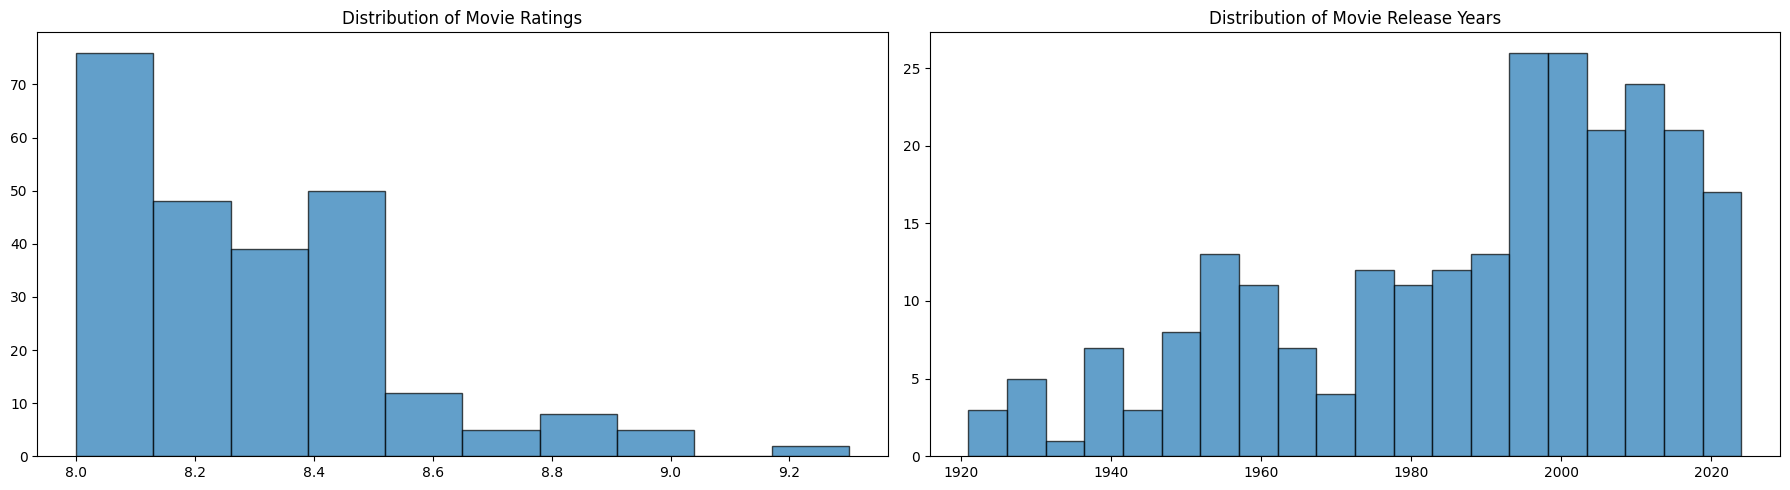

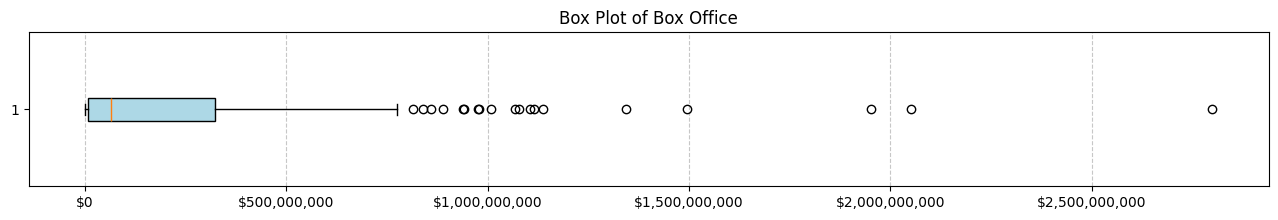

In [58]:
# Perform statistical analyssis on key numerical attributes
pd.options.display.float_format = '{:.2f}'.format
statistical_summary = clean_df[['rating', 'release_year', 'box_office']].describe()
print(statistical_summary)

# Create histograms for rating, release_year
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axes[0].hist(clean_df['rating'], bins=10, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Movie Ratings')

axes[1].hist(clean_df['release_year'], bins=20, edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Movie Release Years')

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 2))
plt.boxplot(clean_df['box_office'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))

plt.title('Box Plot of Box Office')
plt.grid(axis='x', linestyle='--', alpha=0.7)

formatter = ticker.FuncFormatter(lambda x, pos: f'${x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

1. Rating
    - Average rating 8.3 which tells us majority movies are well liked by the viewers.
    - Standard deviation is 0.233, which is low.
    - Indicates most movies are near the mean value.
    - Minimum rating is 8.0 which means, even the lowest rated movie is well reciveved.
    - Maximum rating is 9.3 which means highest rated movie has almost a perfect rating.
    - The middle 50% ratings is between 8.1 - 8.4.

2. Release Year
    - Min is 1921 and max is 2024, which means data set contain moviews throughout the century which is a large span.
    - Standard deviation is 25 which is quite high. Higher variablility of years.
    - Q1 is 1972 and Q3 is 2009 which indicates majority of movies were releaed between this time span since dataset skewed to more recent movies according to the plots.

3. Box Office
    - Mean is 230.64M which means movies earned that much on average.
    - Standard deviation is 371.53M which is really high, which indicates high variation.
    - Min and Max confirm that because min is 399.00 and max is 2.8 billon which indicates two extream end values.

# 3. Data Visualizations

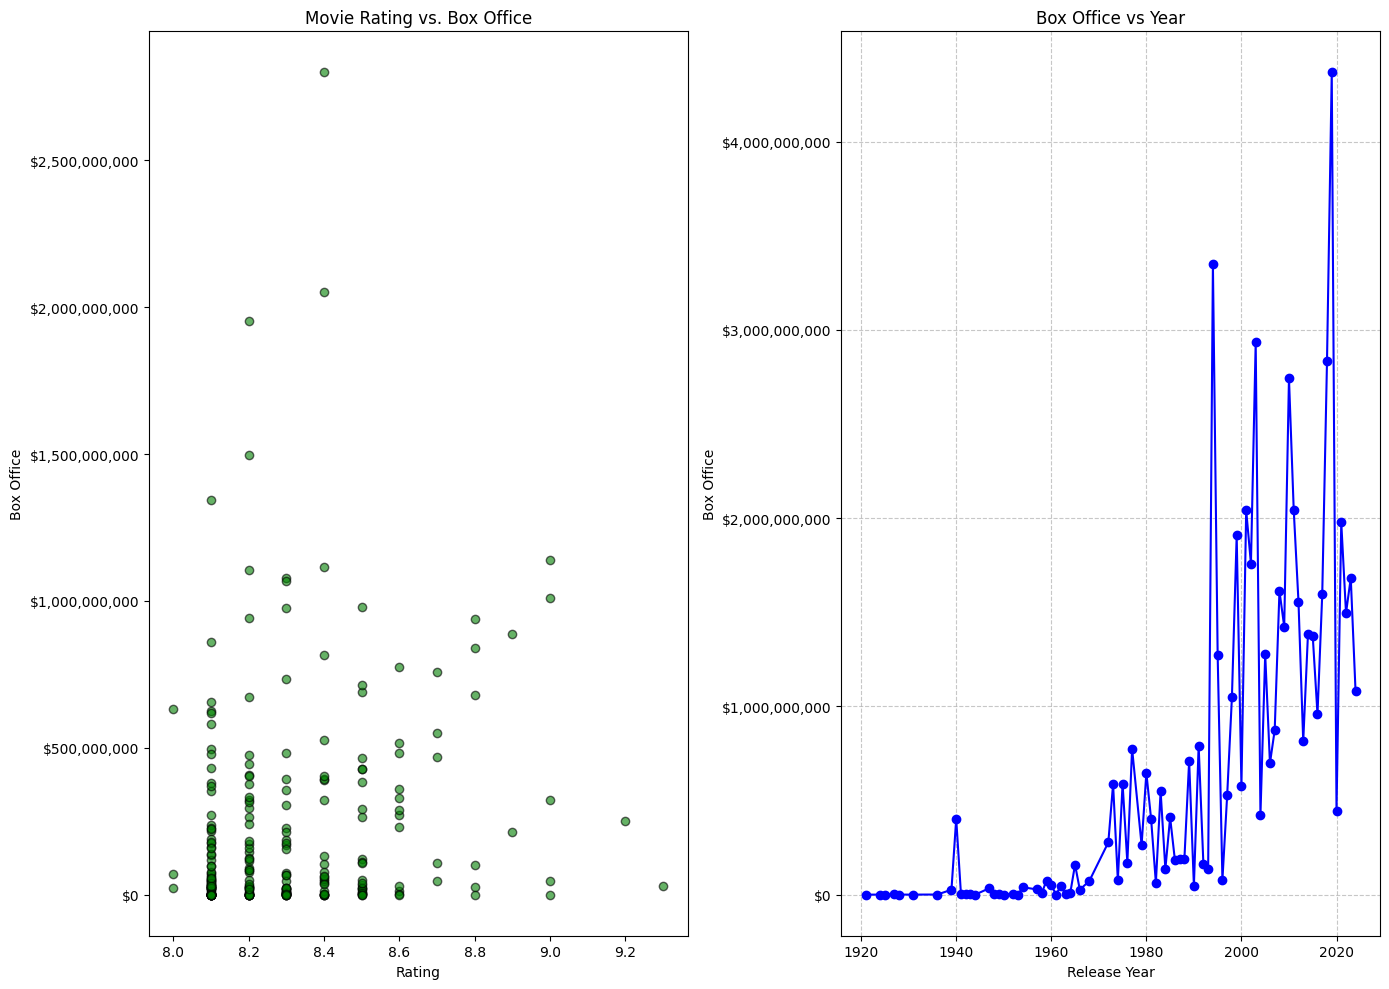

In [ ]:
# Rating vs Box Office
fig, axes = plt.subplots(1, 2, figsize=(14, 10))
formatter = ticker.FuncFormatter(lambda x, pos: f'${x:,.0f}')
axes[0].scatter(clean_df['rating'], clean_df['box_office'], alpha=0.6, color='green', edgecolors='black')
axes[0].set_title('Movie Rating vs. Box Office')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Box Office')
axes[0].yaxis.set_major_formatter(formatter)

# Box Office vs Release Year
df_sorted = clean_df.groupby('release_year')['box_office'].sum().reset_index()
axes[1].plot(df_sorted['release_year'], df_sorted['box_office'], marker='o', linestyle='-', color='blue')
axes[1].set_title('Box Office vs Year')
axes[1].set_xlabel('Release Year')
axes[1].set_ylabel('Box Office')
axes[1].yaxis.set_major_formatter(formatter)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Movie Rating vs Box office

 - Seems like movies rated between 8.1 - 8.4 have consistently given good box office records.
 - There's no indication that higest rated movies earned more than lower rated moviews.
 - Also there are few outliers.

### Box office vs Revenue
 - Box office earnings have steadily increasing over time.
 - After 1990 there has been significant increase of box office earnings.
 - During 1920 - 1960 earnings have been stagnating.
 - Sikes can may indicate blockbuster releases.